In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

In [2]:
# Read in the data
df = pd.read_csv('./movies.csv')
df = df.copy()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#Checking if there is missing data
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [4]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing:.2f}%')

name - 0.00%
rating - 0.01%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.28%
gross - 0.02%
company - 0.00%
runtime - 0.00%


In [5]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [6]:
#Dropping Rows with missing data
df_noNull = df.dropna()
df_noNull.isnull().sum()
df_noNull.describe()

,year,score,votes,budget,gross,runtime
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000


In [7]:
# Data Types for our columns
df_noNull.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
# Change Data types from float to int

pd.set_option('mode.chained_assignment',None)
df_noNull['gross'] = df_noNull['gross'].astype('int64')
df_noNull['budget'] = df_noNull['budget'].astype('int64')

In [9]:
df_noNull.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [10]:
#Create correct year column
df_noNull['released'] = df_noNull['released'].astype('str')
df_noNull['released'].head()

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
3     July 2, 1980 (United States)
4    July 25, 1980 (United States)
Name: released, dtype: object

In [11]:
years = []
for col in df_noNull['released']:
    split_year = col.split()
    if split_year[0].isnumeric():
        years.append(int(split_year[0]))
    
    elif split_year[1].isnumeric():
        years.append(int(split_year[1]))
    elif split_year[2].isnumeric():
        years.append(int(split_year[2]))

pd.set_option('mode.chained_assignment',None)
df_noNull['correct_year'] = years
df = df_noNull.copy()
df.head()



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [12]:
df.describe()

,year,score,votes,budget,gross,runtime,correct_year
count,5421.000000,5421.000000,5.421000e+03,5.421000e+03,5.421000e+03,5421.000000,5421.000000
mean,2001.661317,6.392455,1.150661e+05,3.600917e+07,1.032297e+08,108.152739,2001.814794
std,10.540908,0.962730,1.844073e+05,4.157337e+07,1.873027e+08,18.115698,10.550774
min,1980.000000,1.900000,1.950000e+02,6.000000e+03,3.090000e+02,63.000000,1980.000000
25%,1993.000000,5.800000,1.900000e+04,1.000000e+07,1.073640e+07,95.000000,1993.000000
50%,2002.000000,6.500000,5.200000e+04,2.180000e+07,3.686941e+07,105.000000,2002.000000
75%,2011.000000,7.100000,1.290000e+05,4.500000e+07,1.124625e+08,118.000000,2011.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,271.000000,2020.000000


In [13]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.drop(['year'], axis=1, inplace=True)

In [14]:
pd.set_option('display.max_rows',200)

In [15]:
# df['name'].drop_duplicates().sort_values(ascending=False)
df.drop_duplicates().sort_values(by='name')

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
1099,*batteries not included,PG,Comedy,"December 18, 1987 (United States)",6.7,32000.0,Matthew Robbins,Mick Garris,Hume Cronyn,United States,25000000,65088797,Universal Pictures,106.0,1987
6906,10 Cloverfield Lane,PG-13,Action,"March 11, 2016 (United States)",7.2,300000.0,Dan Trachtenberg,Josh Campbell,John Goodman,United States,15000000,110216998,Paramount Pictures,103.0,2016
3452,10 Things I Hate About You,PG-13,Comedy,"March 31, 1999 (United States)",7.3,309000.0,Gil Junger,Karen McCullah,Heath Ledger,United States,30000000,53478579,Touchstone Pictures,97.0,1999
393,10 to Midnight,R,Crime,"March 11, 1983 (United States)",6.3,7200.0,J. Lee Thompson,William Roberts,Charles Bronson,United States,4520000,7175592,Cannon Films,101.0,1983
5344,"10,000 BC",PG-13,Action,"March 7, 2008 (United States)",5.1,127000.0,Roland Emmerich,Roland Emmerich,Camilla Belle,United States,105000000,269784201,Warner Bros.,109.0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3503,eXistenZ,R,Horror,"April 23, 1999 (United States)",6.8,96000.0,David Cronenberg,David Cronenberg,Jude Law,United Kingdom,15000000,2856712,Dimension Films,97.0,1999
4083,xXx,PG-13,Action,"August 9, 2002 (United States)",5.9,175000.0,Rob Cohen,Rich Wilkes,Vin Diesel,United States,70000000,277448382,Revolution Studios,124.0,2002
7112,xXx: Return of Xander Cage,PG-13,Action,"January 20, 2017 (United States)",5.2,88000.0,D.J. Caruso,Rich Wilkes,Vin Diesel,China,85000000,346118277,Paramount Pictures,107.0,2017
4761,xXx: State of the Union,PG-13,Action,"April 29, 2005 (United States)",4.5,68000.0,Lee Tamahori,Rich Wilkes,Ice Cube,United States,113000000,71022693,Columbia Pictures,101.0,2005


In [16]:
df = df[['name','country', 'budget', 'gross', 'company', 'correct_year','rating', 'genre', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'runtime']]

In [17]:
df.head()

,name,country,budget,gross,company,correct_year,rating,genre,released,score,votes,director,writer,star,runtime
5445,Avatar,United States,237000000,2847246203,Twentieth Century Fox,2009,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,162.0
7445,Avengers: Endgame,United States,356000000,2797501328,Marvel Studios,2019,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,181.0
3045,Titanic,United States,200000000,2201647264,Twentieth Century Fox,1997,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,194.0
6663,Star Wars: Episode VII - The Force Awakens,United States,245000000,2069521700,Lucasfilm,2015,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,138.0
7244,Avengers: Infinity War,United States,321000000,2048359754,Marvel Studios,2018,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,149.0


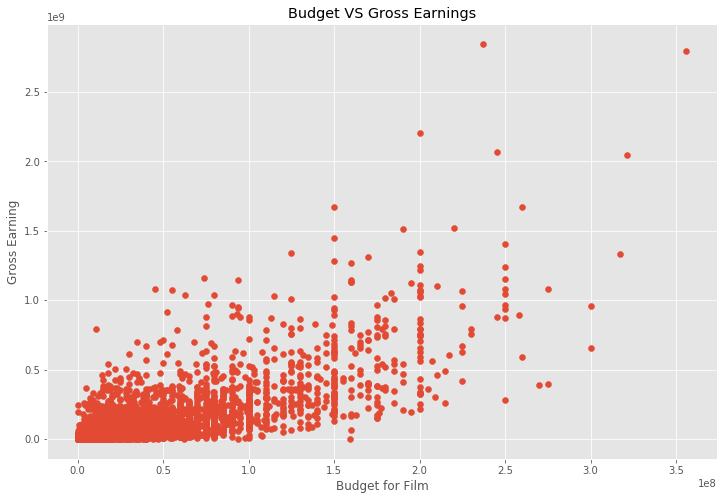

In [18]:
# Checking if Budget has High Correlation with Gross
# Scatter Plot with Budget vs Gross

x = df['budget']
y = df['gross']
plt.scatter(x,y)
plt.title('Budget VS Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earning')
plt.show()

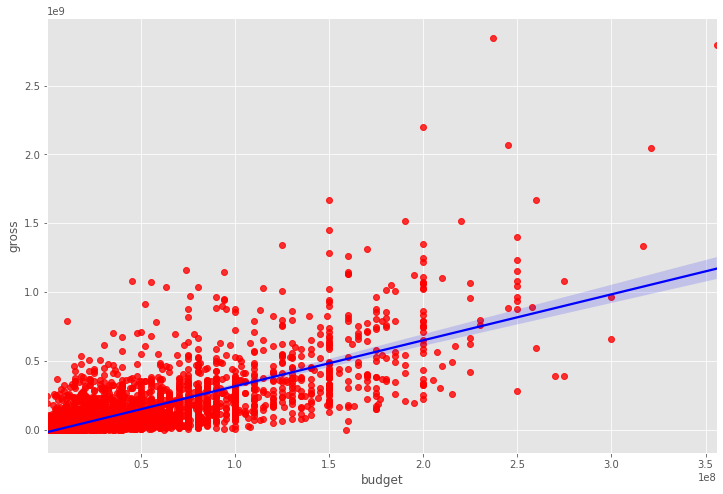

In [19]:
# Plot budget vs Gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [20]:
# Looking at correlation for Gross and Budget
corr_matrix = df.corr(method='pearson') #pearson(default), kendall, spearman
corr_matrix
# There is high correlation between budget and gross

,budget,gross,correct_year,score,votes,runtime
budget,1.000000,0.740247,0.320312,0.072001,0.439675,0.318695
gross,0.740247,1.000000,0.268721,0.222556,0.614751,0.275796
correct_year,0.320312,0.268721,1.000000,0.061923,0.203098,0.075294
score,0.072001,0.222556,0.061923,1.000000,0.474256,0.414068
votes,0.439675,0.614751,0.203098,0.474256,1.000000,0.352303
runtime,0.318695,0.275796,0.075294,0.414068,0.352303,1.000000


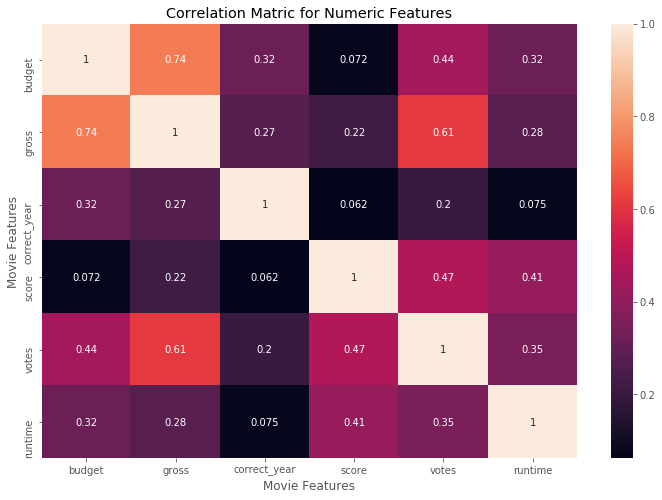

In [21]:
# Visualizing the correlation matrix with seaborn
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [22]:
# Checking if company is correlated with gross
# Changing Country from Nominal to Numeric or Dummy_variables

df_numerized = df.copy()

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

        
df_numerized
# df_numerized.dtypes

,name,country,budget,gross,company,correct_year,rating,genre,released,score,votes,director,writer,star,runtime
5445,386,47,237000000,2847246203,1382,2009,5,0,527,7.8,1100000.0,785,1263,1534,162.0
7445,388,47,356000000,2797501328,983,2019,5,0,137,8.4,903000.0,105,513,1470,181.0
3045,4909,47,200000000,2201647264,1382,1997,5,6,534,7.8,1100000.0,785,1263,1073,194.0
6663,3643,47,245000000,2069521700,945,2015,5,0,529,7.8,876000.0,768,1806,356,138.0
7244,389,47,321000000,2048359754,983,2018,5,0,145,8.4,897000.0,105,513,1470,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,3794,47,3000000,5073,1385,2015,6,6,890,5.8,3500.0,585,2924,1498,96.0
2434,2969,47,5000000,2970,1376,1994,5,0,1467,4.5,1900.0,1805,3102,186,97.0
3681,1595,6,5000000,2554,466,2001,3,6,1721,6.8,43000.0,952,1683,527,108.0
272,2909,47,800000,2270,582,1982,6,9,1525,3.9,2300.0,261,55,1473,85.0


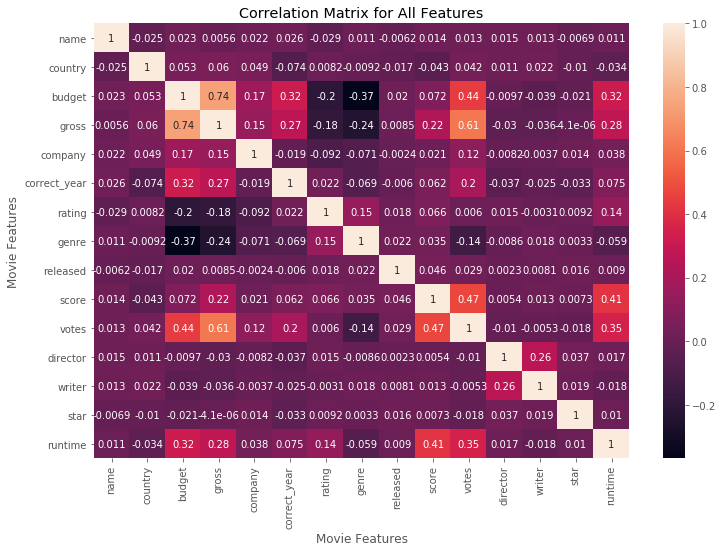

In [25]:
# Correlation matrix for all columns numerized
corr_matrix2 = df_numerized.corr(method='pearson')
sns.heatmap(corr_matrix2,annot=True)
plt.title('Correlation Matrix for All Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()
# Chart below Company has very low correlation with Gross

In [26]:
df_numerized.corr()

,name,country,budget,gross,company,correct_year,rating,genre,released,score,votes,director,writer,star,runtime
name,1.000000,-0.025490,0.023392,0.005639,0.021697,0.025542,-0.029234,0.010996,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,0.010850
country,-0.025490,1.000000,0.052977,0.060078,0.048569,-0.073569,0.008230,-0.009164,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,-0.034477
budget,0.023392,0.052977,1.000000,0.740247,0.170235,0.320312,-0.203946,-0.368523,0.019952,0.072001,0.439675,-0.009662,-0.039466,-0.021473,0.318695
gross,0.005639,0.060078,0.740247,1.000000,0.149553,0.268721,-0.181906,-0.244101,0.008501,0.222556,0.614751,-0.029560,-0.035885,-0.000004,0.275796
company,0.021697,0.048569,0.170235,0.149553,1.000000,-0.018806,-0.092357,-0.071334,-0.002407,0.020656,0.118470,-0.008223,-0.003697,0.014082,0.037585
correct_year,0.025542,-0.073569,0.320312,0.268721,-0.018806,1.000000,0.022021,-0.069147,-0.005989,0.061923,0.203098,-0.037371,-0.025495,-0.032687,0.075294
rating,-0.029234,0.008230,-0.203946,-0.181906,-0.092357,0.022021,1.000000,0.147796,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.140792
genre,0.010996,-0.009164,-0.368523,-0.244101,-0.071334,-0.069147,0.147796,1.000000,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.059237
released,-0.006152,-0.017228,0.019952,0.008501,-0.002407,-0.005989,0.018083,0.022142,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,0.008975
score,0.014450,-0.043051,0.072001,0.222556,0.020656,0.061923,0.065983,0.035106,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,0.414068


In [28]:
# Unstacking Correlation Matrix
pd.set_option('display.max_rows', None)
corr_matrix_table = df_numerized.corr()
corr_matrix_pair = corr_matrix_table.unstack()
corr_matrix_pair

name          name            1.000000
              country        -0.025490
              budget          0.023392
              gross           0.005639
              company         0.021697
              correct_year    0.025542
              rating         -0.029234
              genre           0.010996
              released       -0.006152
              score           0.014450
              votes           0.012615
              director        0.015246
              writer          0.012880
              star           -0.006882
              runtime         0.010850
country       name           -0.025490
              country         1.000000
              budget          0.052977
              gross           0.060078
              company         0.048569
              correct_year   -0.073569
              rating          0.008230
              genre          -0.009164
              released       -0.017228
              score          -0.043051
              votes      

In [29]:
sorted_corr_pair = corr_matrix_pair.sort_values()
sorted_corr_pair

genre         budget         -0.368523
budget        genre          -0.368523
genre         gross          -0.244101
gross         genre          -0.244101
rating        budget         -0.203946
budget        rating         -0.203946
rating        gross          -0.181906
gross         rating         -0.181906
genre         votes          -0.135990
votes         genre          -0.135990
rating        company        -0.092357
company       rating         -0.092357
country       correct_year   -0.073569
correct_year  country        -0.073569
genre         company        -0.071334
company       genre          -0.071334
correct_year  genre          -0.069147
genre         correct_year   -0.069147
              runtime        -0.059237
runtime       genre          -0.059237
country       score          -0.043051
score         country        -0.043051
budget        writer         -0.039466
writer        budget         -0.039466
director      correct_year   -0.037371
correct_year  director   

In [30]:
high_corr = sorted_corr_pair[(sorted_corr_pair)>0.5]
high_corr

votes         gross           0.614751
gross         votes           0.614751
budget        gross           0.740247
gross         budget          0.740247
name          name            1.000000
genre         genre           1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
rating        rating          1.000000
correct_year  correct_year    1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
runtime       runtime         1.000000
dtype: float64

In [ ]:
# Votes vs Gross AND Gross VS Budget have highest correlation